In [1]:
import pandas as pd
import numpy as np


In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

!wget $data

--2021-09-26 05:37:34--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  26.7MB/s    in 0.3s    

2021-09-26 05:37:36 (26.7 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
feature_cols = ['latitude', 'longitude', 'price',
        'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'room_type']
df_feature_set = df[feature_cols]
df_feature_set.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group                   0
room_type                             0
dtype: int64

In [7]:
df_feature_set.reviews_per_month = df_feature_set.reviews_per_month.fillna(0)

/usr/local/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df_feature_set.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
room_type                         0
dtype: int64

In [9]:
df_feature_set.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### Question 1: What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [13]:
df_feature_set.neighbourhood_group.value_counts() #Q1: Manhattan

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

#### Split Data

In [20]:
df_feature_set.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
neighbourhood_group                object
room_type                          object
dtype: object

In [21]:
df_feature_set.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [22]:
categorical_columns = list(df_feature_set.dtypes[df_feature_set.dtypes == 'object'].index)
for c in categorical_columns:
    df_feature_set[c] = df_feature_set[c].str.lower().str.replace(' ', '_')

/var/folders/hb/6ftrzv4d27l4qgry0h5tcc040000gn/T/ipykernel_95379/360350398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_set[c] = df_feature_set[c].str.lower().str.replace(' ', '_')


In [31]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_feature_set, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [32]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,40.72760,-73.94495,99,3,29,0.70,13,50,brooklyn,entire_home/apt
1,40.70847,-74.00498,57,1,0,0.00,1,7,manhattan,private_room
2,40.83149,-73.92766,70,40,0,0.00,1,0,bronx,entire_home/apt
3,40.66448,-73.99407,130,2,3,0.08,1,0,brooklyn,entire_home/apt
4,40.74118,-74.00012,110,1,48,1.80,2,67,manhattan,private_room


In [35]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

#### Question 2

In [36]:
df_train.dtypes

latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
neighbourhood_group                object
room_type                          object
dtype: object

In [37]:
numerical = ['latitude', 'longitude', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [40]:
# Here we are identifying the correlation matrix among the numerical columns
corr_mat_numerical_cols = df_train[numerical].corr()
corr_mat_numerical_cols

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


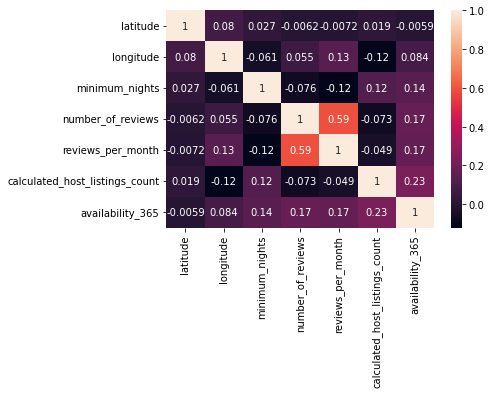

In [41]:
# Plot the correlation matrix in a heatmap

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mat_numerical_cols, annot = True)
plt.show()

In [42]:
df_full_train.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group', 'room_type'],
      dtype='object')

In [43]:
above_average = df_full_train.price >= 152

In [44]:
df_full_train[above_average].head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
32645,40.71577,-73.95530,295,3,11,0.87,1,1,brooklyn,entire_home/apt
46572,40.76786,-73.95639,260,7,1,1.00,1,43,manhattan,entire_home/apt
41778,40.76193,-73.98573,310,30,0,0.00,65,338,manhattan,entire_home/apt
46329,40.68906,-73.98983,329,30,1,1.00,2,63,brooklyn,entire_home/apt
4160,40.69265,-73.97009,225,3,95,1.51,2,112,brooklyn,entire_home/apt


#### Question 3

In [45]:
from sklearn.metrics import mutual_info_score


In [50]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, above_average).round(2)

In [51]:
categorical = ['neighbourhood_group', 'room_type']
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

#### Question 4

In [52]:
from sklearn.feature_extraction import DictVectorizer

In [53]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [68]:
df_train_with_avg = pd.DataFrame()
df_train_with_avg['price'] = y_train
df_train_with_avg['above_average'] = (df_train_with_avg['price'] >= 152).astype(int)
df_train_with_avg

,price,above_average
0,99,0
1,57,0
2,70,0
3,130,0
4,110,0
...,...,...
29332,50,0
29333,125,0
29334,299,1
29335,65,0


In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train,df_train_with_avg.above_average.values)

LogisticRegression(random_state=42, solver='liblinear')

In [72]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [73]:
y_pred = model.predict_proba(X_val)[:, 1]

In [78]:
price_pred_above_avg = (y_pred >= 152)

In [79]:
df_val_with_avg = pd.DataFrame()
df_val_with_avg['price'] = y_val
df_val_with_avg['above_average'] = (df_val_with_avg['price'] >= 152).astype(int)


In [82]:
original_accuracy = (df_val_with_avg.above_average == price_pred_above_avg).mean().round(2)
original_accuracy

0.69

#### Question 5

In [89]:
def eliminate_column_and_train(df, column_name):
    dv = DictVectorizer(sparse=False)
    df = df.copy()
    df.drop(column_name,axis='columns', inplace=True)
    train_dict = df.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train,df_train_with_avg.above_average.values)
    return model
    

In [128]:
# df_val_without_neighbourhood_group = df_val[categorical + numerical].drop('neighbourhood_group',axis='columns')

dv = DictVectorizer(sparse=False)
df = df_train[categorical + numerical].copy()
new_df = df.drop('neighbourhood_group',axis='columns')
# print(df_train[categorical + numerical].columns)
# print(new_df.columns)
train_dict = new_df.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model_1 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_1.fit(X_train,df_train_with_avg.above_average.values)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model_1.predict_proba(X_val)[:, 1]

price_pred_above_avg = (y_pred >= 152)

accuracy_without_neighbourhood_group = (df_val_with_avg.above_average == price_pred_above_avg).mean()
print("accuracy_without_neighbourhood_group", original_accuracy - accuracy_without_neighbourhood_group)

df = df_train[categorical + numerical].copy()
df.drop('room_type',axis='columns', inplace=True)
# print(df_train[categorical + numerical].columns)
# print(df.columns)
train_dict = df.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model_2 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_2.fit(X_train,df_train_with_avg.above_average.values)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model_2.predict_proba(X_val)[:, 1]

price_pred_above_avg = (y_pred >= 152)

accuracy_without_room_type = (df_val_with_avg.above_average == price_pred_above_avg).mean()
print("accuracy_without_room_type", original_accuracy - accuracy_without_room_type)

df = df_train[categorical + numerical].copy()
df.drop('number_of_reviews',axis='columns', inplace=True)
# print(df_train[categorical + numerical].columns)
# print(df.columns)
train_dict = df.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model_3 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_3.fit(X_train,df_train_with_avg.above_average.values)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model_3.predict_proba(X_val)[:, 1]

price_pred_above_avg = (y_pred >= 152)

accuracy_number_of_reviews = (df_val_with_avg.above_average == price_pred_above_avg).mean()
print("number_of_reviews", original_accuracy - accuracy_number_of_reviews)

df = df_train[categorical + numerical].copy()
df.drop('reviews_per_month',axis='columns', inplace=True)
# print(df_train[categorical + numerical].columns)
# print(df.columns)
train_dict = df.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model_4 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_4.fit(X_train,df_train_with_avg.above_average.values)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model_4.predict_proba(X_val)[:, 1]

price_pred_above_avg = (y_pred >= 152)

accuracy_reviews_per_month = (df_val_with_avg.above_average == price_pred_above_avg).mean()
print("accuracy_reviews_per_month", original_accuracy - accuracy_reviews_per_month)


# val_dict = df_val_without_neighbourhood_group.to_dict(orient='records')
# X_val = dv.transform(val_dict)

# model_without_neighbourhood_group = eliminate_column_and_train(df_train[categorical + numerical],'neighbourhood_group')

# print(model_without_neighbourhood_group.predict_proba(X_val))

# y_pred = model_without_neighbourhood_group.predict_proba(X_val)[:, 1]

# price_pred_above_avg = (y_pred >= 152)

# accuracy_without_neighbourhood_group = (df_val_with_avg.above_average == price_pred_above_avg).mean().round(2)
# accuracy_without_neighbourhood_group


accuracy_without_neighbourhood_group -0.0034246855506698815
accuracy_without_room_type -0.0034246855506698815
number_of_reviews -0.0034246855506698815
accuracy_reviews_per_month -0.0034246855506698815


#### Question 6

In [114]:
df_full_train, df_test = train_test_split(df_feature_set, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [115]:
from sklearn.linear_model import Ridge

In [116]:
ridge_model = Ridge(alpha=0, random_state=42)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0, random_state=42)

In [119]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = ridge_model.predict(X_val)

In [120]:
y_pred

array([4.11523438, 5.21777344, 5.01269531, ..., 4.55859375, 4.19433594,
       5.14550781])

In [121]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [123]:
score_with_0 = rmse(y_val, y_pred) 
score_with_0.round(3) # RMSE with aplha 0

0.497

In [125]:
for a in [0, 0.01, 0.1, 1, 10]:
    ridge_model = Ridge(alpha=a, random_state=42)
    ridge_model.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_val)
    score = rmse(y_val, y_pred)
    print('alpha, score', a, score.round(3))

alpha, score 0 0.497
alpha, score 0.01 0.497
alpha, score 0.1 0.497
alpha, score 1 0.497
alpha, score 10 0.498
